# Data Analytic Project: E-Commerce Public Dataset
- **Name:** Hanuga Fathur Chaerulisma
- **Email:** hanugafc@gmail.com
- **ID Dicoding:** 

# Define the Business Question
- What are the most selling products and what are the fewest selling products?
- How demographic customers look like?
- How performance order and revenue per month?
- Who are the top 5 of the most loyal customers ?

# Import All Required Libraries 

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

# Data Wrangling

## Gathering Data

### Import Data Customer

In [3]:
customer_df = pd.read_csv('data/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Import Data Geolocation

In [34]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Import Data Order
#### Import Order

In [4]:
order_df = pd.read_csv('data/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Import Order Items

In [5]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Import Data Product

In [6]:
product_df = pd.read_csv('data/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Insight from Data Gathering 
- There are 6 datasets that have been imported
- The datasets are customer_df, geolocation_df, order_df, order_items_df, product_df, and product_category_df
- The datasets have been imported successfully
- The datasets have been displayed the first 5 rows successfully

## Assessing Data

### Customer Data

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
print("Check null values in customer data: ")
print(customer_df.isnull().sum())

Check null values in customer data: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [17]:
print("Number of duplicated: ", customer_df.duplicated().sum())

Number of duplicated:  0


In [18]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Geolocation Data

In [35]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [37]:
print("Check null values in geolocation data: ")
print(geolocation_df.isnull().sum())

Check null values in geolocation data: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [38]:
print("Number of duplicated: ", geolocation_df.duplicated().sum())

Number of duplicated:  261831


In [39]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Order Data

#### Order Data

In [9]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
print("Check null values in order data: ")
print(order_df.isnull().sum())

Check null values in order data: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [20]:
print("Number of duplicated: ", order_df.duplicated().sum())

Number of duplicated:  0


In [21]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Order Data Items

In [22]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
print("Check null values in order items data: ")
print(order_items_df.isnull().sum())

Check null values in order items data: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [24]:
print("Number of duplicated: ", order_items_df.duplicated().sum())

Number of duplicated:  0


In [25]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Product Data

#### Product Data


In [26]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
print("Check null values in product data: ")
print(product_df.isnull().sum())

Check null values in product data: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [28]:
print("Number of duplicated: ", product_df.duplicated().sum())

Number of duplicated:  0


In [29]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Product Category Data


In [30]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
print("Check null values in product category data: ")
print(product_category_df.isnull().sum())

Check null values in product category data: 
product_category_name            0
product_category_name_english    0
dtype: int64


In [32]:
print("Number of duplicated: ", product_category_df.duplicated().sum())

Number of duplicated:  0


In [33]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Insight from Data

#### customer_df
- There are no missing values in the customer data
- There are no duplicate values in the customer data

#### geolocation_df
- There are no missing values in the geolocation data
- There are duplicate values in the geolocation data

#### order_df
- There are wrong data types in column: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- There are missing values in the column: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- There are no duplicate values in the order data

#### order_items_df
- There are no missing values in the order items data
- There are no duplicate values in the order items data
- There are wrong data types in column: shipping_limit_date

#### product_df
- There are missing values in the column: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty
- There are no duplicate values in the product data

#### product_category_df
- There are no missing values in the product category data
- There are no duplicate values in the product category data


## Data Cleaning

### Cleaning geolocation_df


In [40]:
geolocation_df.drop_duplicates(inplace=True)
print("Number of duplicated: ", geolocation_df.duplicated().sum())

Number of duplicated:  0


### Cleaning order_df

#### Converting Wrong Data Types into Correct Data Types (Object to Datetime)

In [41]:
wrong_data_type_columns_in_order_df = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in wrong_data_type_columns_in_order_df:
    order_df[column] = pd.to_datetime(order_df[column])

In [42]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Handling Missing Values

In this case, I decided to not drop the missing values because it will affect valuable information in the data.

In [43]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Cleaning order_items_df

#### Converting Wrong Data Types into Correct Data Types (Object to Datetime)

In [45]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Cleaning product_df

#### Handling Missing Values
In this case, I decided to not drop the missing values because it will affect valuable information in the data.

In [44]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Insight from Data Cleaning

customer_df
- There are no missing values in the customer data
- There are no duplicate values in the customer data
- There are no wrong data types in the customer data

geolocation_df
- There are no missing values in the geolocation data
- There are no duplicate values in the geolocation data
- There are no wrong data types in the geolocation data

order_df
- There are missing values in the column: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date for keeping valuable information
- There are no duplicate values in the order data
- There are no wrong data types in the order data

order_items_df
- There are no missing values in the order items data
- There are no duplicate values in the order items data
- There are no wrong data types in the order items data

product_df
- There are missing values in the column: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty for keeping valuable information

product_category_df
- There are no missing values in the product category data
- There are no duplicate values in the product category data
- There are no wrong data types in the product category data

# Exploratory Data Analysis (EDA)

## Exploring Data

### Exploring customer_df


In [46]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Customer City Distribution

In [47]:
customer_df.groupby('customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

#### Customer State Distribution

In [50]:
customer_df.groupby('customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Exploring geolocation_df

In [54]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [55]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: count, Length: 8011, dtype: int64

#### Converting são paulo to sao paulo in geolocation_df
converting from são paulo to sao paulo because actually it is the same city

In [56]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].replace('são paulo', 'sao paulo')

geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo            99645
rio de janeiro       35177
belo horizonte       19474
curitiba             11263
porto alegre          8702
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
salgadinho               1
casserengue              1
Name: count, Length: 8010, dtype: int64

### Exploring order_df

In [57]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [58]:
actual_delivery_time = order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']
actual_delivery_time = actual_delivery_time.apply(lambda x: x.total_seconds())
order_df['actual_delivery_time'] = round(actual_delivery_time / (60 * 60 * 24))


order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


### Exploring order_df and customer_df

In [59]:
customer_order_df = pd.merge(
    left=order_df, 
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


#### Order City Distribution

In [60]:
customer_order_df.groupby('customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: order_id, Length: 4119, dtype: int64

#### Order State Distribution


In [61]:
customer_order_df.groupby('customer_state').order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

### Exploring order_items_df, order_df, product_df, and product_category_df

In [62]:
order_items_order_df = pd.merge(
    left=order_items_df, 
    right=order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0


In [63]:
order_items_order_product_df = pd.merge(
    left=order_items_order_df, 
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,actual_delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29,8.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15,16.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05,8.0,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20,6.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17,25.0,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [64]:
order_item_product_df = pd.merge(
    left=order_items_order_product_df, 
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
order_item_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,actual_delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,8.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,16.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,8.0,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,6.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,25.0,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


#### Most Selling Product


In [181]:
most_selling_product = order_item_product_df.groupby('product_category_name_english')['order_item_id'].sum().sort_values(ascending=False)
most_selling_product = most_selling_product.reset_index()
most_selling_product.head()



,product_category_name_english,order_item_id
0,bed_bath_table,13665
1,furniture_decor,11540
2,health_beauty,11081
3,sports_leisure,9932
4,computers_accessories,9874


#### Fewest Selling Product

In [182]:
fewest_selling_product = order_item_product_df.groupby('product_category_name_english')['order_item_id'].sum().sort_values(ascending=True)
fewest_selling_product = fewest_selling_product.reset_index()
fewest_selling_product.head()

,product_category_name_english,order_item_id
0,security_and_services,2
1,fashion_childrens_clothes,8
2,la_cuisine,16
3,cds_dvds_musicals,16
4,arts_and_craftmanship,26


### Exploring from all df

In [198]:
all_df = pd.merge(
    left=order_item_product_df, 
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2.0,30000.0,50.0,30.0,40.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2.0,3050.0,33.0,13.0,33.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,1.0,200.0,16.0,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,1.0,3750.0,35.0,40.0,30.0,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


#### Distribution Order by Customer City

In [109]:
bycity_df = all_df.groupby('customer_city').customer_unique_id.nunique().reset_index().sort_values(by='customer_unique_id', ascending=False)
bycity_df.rename(columns={
    'customer_unique_id': 'total_customer'
}, inplace=True)
bycity_df

,customer_city,total_customer
3588,sao paulo,14865
3147,rio de janeiro,6576
452,belo horizonte,2654
557,brasilia,2056
1141,curitiba,1455
...,...,...
3279,santa fe de minas,1
1309,fagundes,1
1310,farol,1
1317,faxinalzinho,1


#### Distribution Order by Customer State

In [110]:
bystate_df = all_df.groupby('customer_state').customer_unique_id.nunique().reset_index().sort_values(by='customer_unique_id', ascending=False)
bystate_df.rename(columns={
    'customer_unique_id': 'total_customer'
}, inplace=True)
bystate_df

,customer_state,total_customer
25,SP,39981
18,RJ,12303
10,MG,11178
22,RS,5249
17,PR,4840
23,SC,3513
4,BA,3257
6,DF,2062
7,ES,1956
8,GO,1942


#### Most Selling Product

In [183]:
most_selling_product_df = all_df.groupby('product_category_name_english').order_item_id.sum().sort_values(ascending=False).reset_index()
most_selling_product_df.head()


,product_category_name_english,order_item_id
0,bed_bath_table,13665
1,furniture_decor,11540
2,health_beauty,11081
3,sports_leisure,9932
4,computers_accessories,9874


#### Fewest Selling Product

In [184]:
fewest_selling_product_df = all_df.groupby('product_category_name_english').order_item_id.sum().sort_values(ascending=True).reset_index()
fewest_selling_product_df.head()

,product_category_name_english,order_item_id
0,security_and_services,2
1,fashion_childrens_clothes,8
2,la_cuisine,16
3,cds_dvds_musicals,16
4,arts_and_craftmanship,26


#### Monthly Sales Performance


In [185]:
monthly_sales_df = all_df.resample('M', on='order_approved_at').agg({
    'order_id': 'size',
    'price': 'sum'
})
monthly_sales_df.head()
monthly_sales_df.index = monthly_sales_df.index.strftime('%Y-%m')
monthly_sales_df = monthly_sales_df.reset_index()
monthly_sales_df.rename(columns={
    'order_id': 'total_order',
    'price': 'revenue'
}, inplace=True)
monthly_sales_df.head()

/var/folders/3q/m608zwdn7_3_d0cjdkbqsbm40000gn/T/ipykernel_40333/2457868131.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_df = all_df.resample('M', on='order_approved_at').agg({


,order_approved_at,total_order,revenue
0,2016-09,3,134.97
1,2016-10,366,49640.05
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,908,114860.71


#### Monthly Order Frequency by Customer

In [186]:
monthly_order_frequency_df = all_df.resample('M', on='order_approved_at').agg({
    'order_id': 'size',
    'customer_unique_id': 'nunique'
})
monthly_order_frequency_df.head()
monthly_order_frequency_df.index = monthly_order_frequency_df.index.strftime('%Y-%m')
monthly_order_frequency_df = monthly_order_frequency_df.reset_index()
monthly_order_frequency_df.rename(columns={
    'order_id': 'total_order',
    'customer_unique_id': 'total_customer'

}, inplace=True)
monthly_order_frequency_df.head()

/var/folders/3q/m608zwdn7_3_d0cjdkbqsbm40000gn/T/ipykernel_40333/4199536461.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_frequency_df = all_df.resample('M', on='order_approved_at').agg({


,order_approved_at,total_order,total_customer
0,2016-09,3,1
1,2016-10,366,307
2,2016-11,0,0
3,2016-12,1,1
4,2017-01,908,719


#### Most Loyal Customer with Total Spending

In [187]:
most_loyal_customer_df = all_df.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'price': 'sum'
}).sort_values(by='price', ascending=False)
most_loyal_customer_df.head()
most_loyal_customer_df.rename(columns={
    'order_id': 'total_order',
    'price': 'total_spending'
}, inplace=True)
most_loyal_customer_df.head()

,total_order,total_spending
customer_unique_id,,
0a0a92112bd4c708ca5fde585afaa872,8,13440.0
da122df9eeddfedc1dc1f5349a1a690c,2,7388.0
763c8b1c9c68a0229c42c9fc6f662b93,4,7160.0
dc4802a71eae9be1dd28f5d788ceb526,1,6735.0
459bef486812aa25204be022145caa62,1,6729.0


## Insight from Exploring Data
- The most selling product is bed_bath_table
- The fewest selling product is security_and_services
- The most city that orders are made is sao paulo
- The most state that orders are made is SP
- The most loyal customer is 0a0a92112bd4c708ca5fde585afaa872 with total spending 13440.00
- The monthly sales performance is increasing from 2017-01 to 2018-08

# Visualization & Explanatory Analysis

## Question 1: What are the most selling products and what are the fewest selling products?

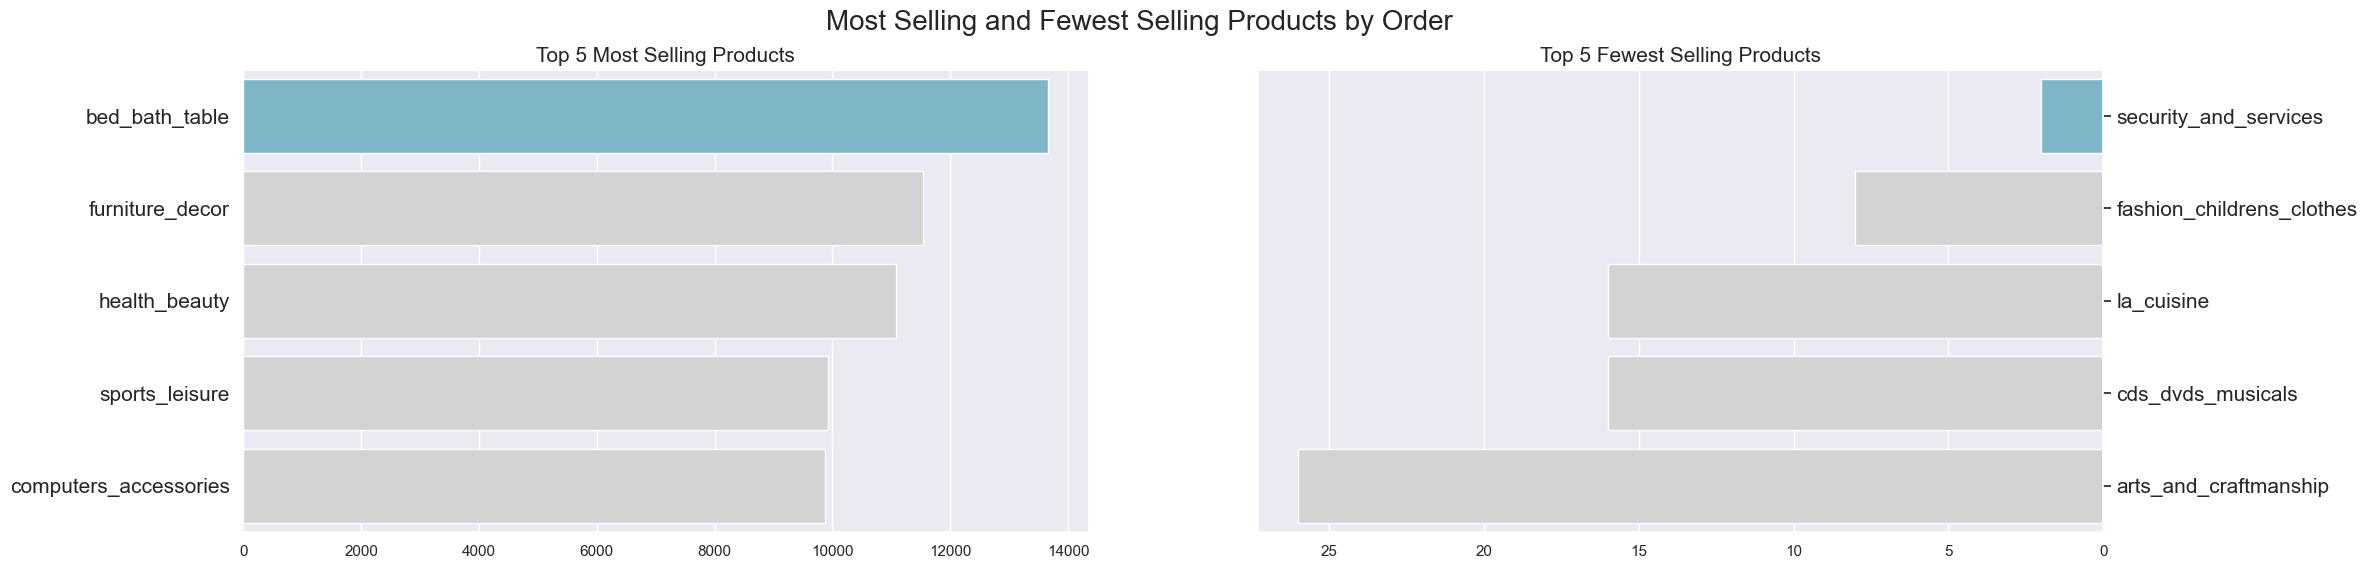

In [203]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", hue="product_category_name_english", legend=False, data=most_selling_product.head(5), palette=colors, ax=ax[0])
ax[0].set_title("Top 5 Most Selling Products", loc='center', fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="order_item_id", y="product_category_name_english", hue="product_category_name_english", legend=False, data=fewest_selling_product.head(5), palette=colors, ax=ax[1])
ax[1].set_title("Top 5 Fewest Selling Products", loc='center', fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=15)


plt.suptitle("Most Selling and Fewest Selling Products by Order ", fontsize=20)
plt.show()


## Question 2: How demographic customers look like?

### Customer City Distribution

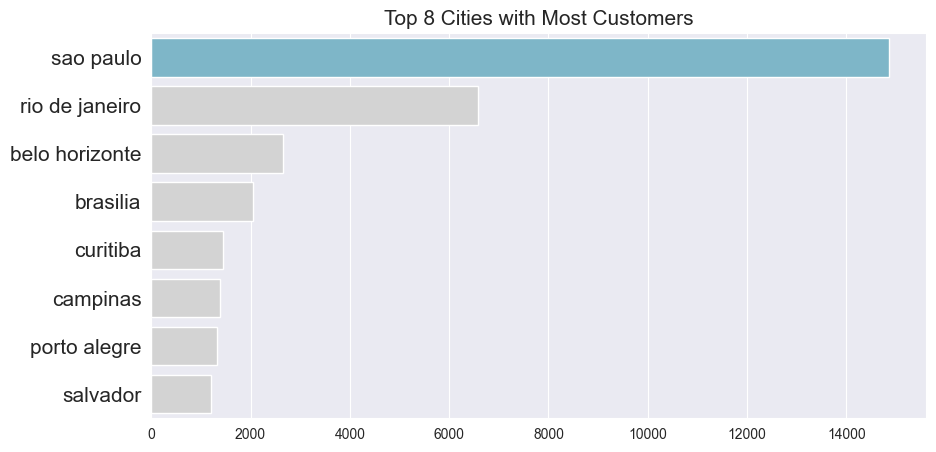

In [119]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="total_customer",
    y="customer_city",
    hue="customer_city",
    legend=False,
    data=bycity_df.sort_values(by='total_customer', ascending=False).head(8),
    palette=colors_
)
plt.title("Top 8 Cities with Most Customers", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=15)
plt.show()

### Customer State Distribution

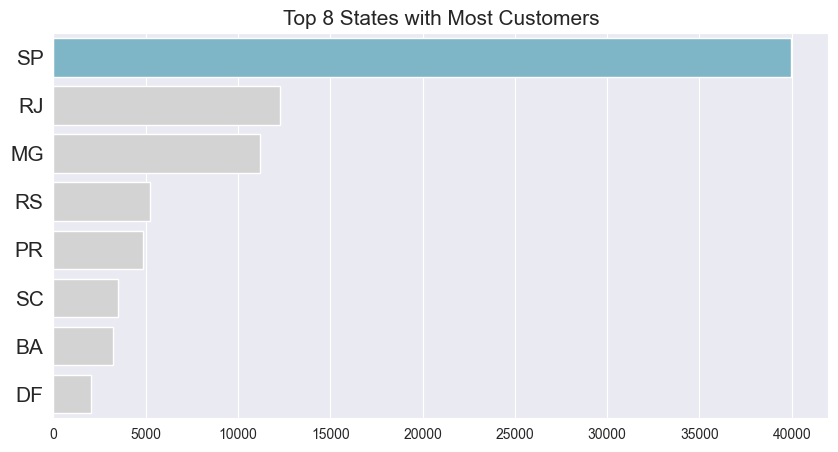

In [120]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="total_customer",
    y="customer_state",
    hue="customer_state",
    legend=False,
    data=bystate_df.sort_values(by='total_customer', ascending=False).head(8),
    palette=colors_
)
plt.title("Top 8 States with Most Customers", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=15)
plt.show()

## Question 3: How performance order and revenue per month?

### Monthly Order Performance

/var/folders/3q/m608zwdn7_3_d0cjdkbqsbm40000gn/T/ipykernel_40333/2126210586.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({


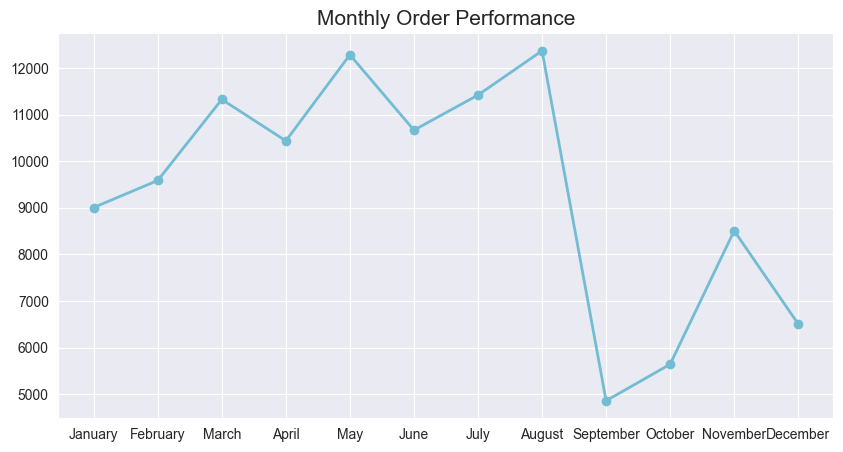

In [158]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    'order_id': 'size',
    'price': 'sum'
})


monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #change to month name
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'total_order',
    'price': 'revenue'
}, inplace=True)


# group by month and sum the total order and revenue
monthly_orders_df = monthly_orders_df.groupby('order_approved_at').agg({
    'total_order': 'sum',
    'revenue': 'sum'
}).reset_index()


# Sorting the data by month name
month_orders = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_orders_df['order_approved_at'] = pd.Categorical(monthly_orders_df['order_approved_at'], categories=month_orders, ordered=True)

monthly_orders_df = monthly_orders_df.sort_values(by='order_approved_at')


# Visualize the order performance per month
plt.figure(figsize=(10,5))
plt.plot(monthly_orders_df['order_approved_at'], monthly_orders_df['total_order'], marker='o', linewidth=2, color='#72BCD4')
plt.title("Monthly Order Performance", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### Monthly Revenue Performance

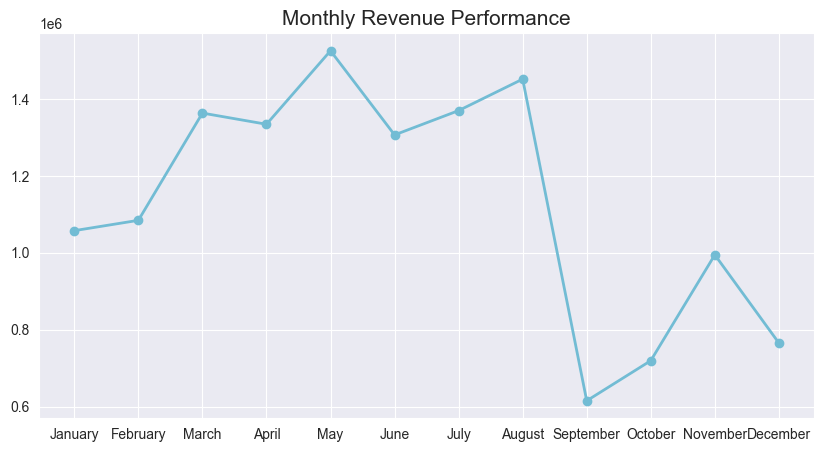

In [159]:
plt.figure(figsize=(10,5))
plt.plot(monthly_orders_df['order_approved_at'], monthly_orders_df['revenue'], marker='o', linewidth=2, color='#72BCD4')
plt.title("Monthly Revenue Performance", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Question 4: Who are the top 5 of the most loyal customers ?

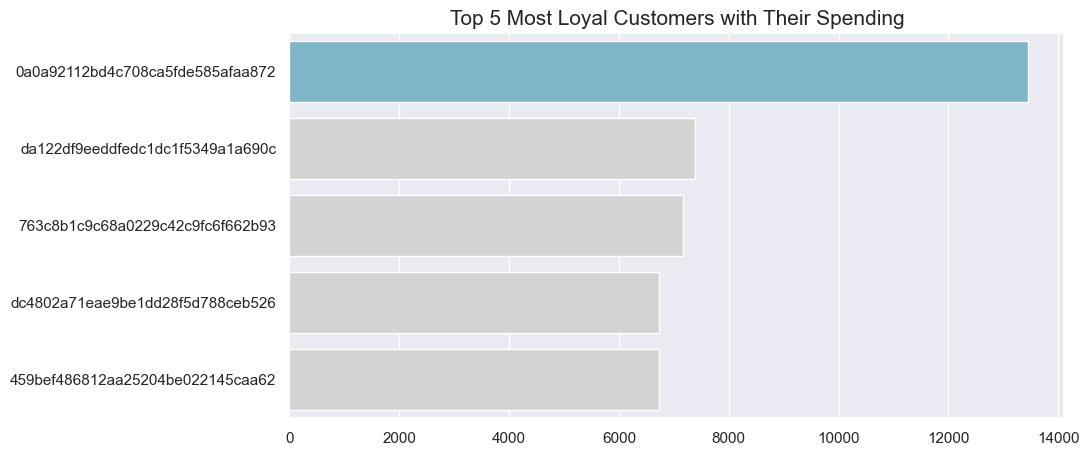

                                  total_order  total_spending
customer_unique_id                                           
0a0a92112bd4c708ca5fde585afaa872            8         13440.0
da122df9eeddfedc1dc1f5349a1a690c            2          7388.0
763c8b1c9c68a0229c42c9fc6f662b93            4          7160.0
dc4802a71eae9be1dd28f5d788ceb526            1          6735.0
459bef486812aa25204be022145caa62            1          6729.0


In [204]:
fig, ax = plt.subplots(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="total_spending", y="customer_unique_id", hue="customer_unique_id", legend=False, data=most_loyal_customer_df.head(5), palette=colors_)
plt.title("Top 5 Most Loyal Customers with Their Spending", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

print(most_loyal_customer_df.head(5))

## Insight from Visualization & Explanatory Analysis
- The most selling product is bed_bath_table.
- The fewest selling product is security_and_services.
- The most city that orders are made is sao paulo.
- The most state that orders are made is SP.
- The most loyal customer is 0a0a92112bd4c708ca5fde585afaa872 with total spending 13440.00.
- Increasing order from January to August makes the revenue increase.
- Dropping order performance in September effects the revenue performance. 
 

# RFM Analysis

### Calculate Recency, Frequency, and Monetary

In [194]:
rfm_df = all_df.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'price': 'sum'
})
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

# Calculate Recency
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = pd.to_datetime(all_df['order_purchase_timestamp']).dt.date.max()
rfm_df['recency'] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119
2,0000f46a3911fa3c0805444483337064,1,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293


### Visualize RFM Analysis

                            customer_id  frequency  monetary  recency
95083  ff22e30958c13ffe219db7d711e8f564          2    290.00        0
65645  afbcfd0b9c5233e7ccc73428526fbb52          1    457.75        5
92476  f80013faf776e37bcea7634d59c2181e          1     65.00        5
67518  b4dcade04bc548b7e3b0243c801f8c26          1     99.00        5
1538   0421e7a23f21e5d54efed456aedbc513          1    109.90        5
                            customer_id  frequency  monetary  recency
52597  8d50f5eadf50201ccdcedfb9e2ac8455         16    729.62       14
23302  3e43e6105506432c953e165fb2acf44c          9   1000.85      188
10281  1b6c7548a2a1f9037c1fd3ddfed95f33          7    809.21      201
37532  6469f99c1f9dfae7733b25662e7f1782          7    664.20       67
75560  ca77025e7201e3b30c44b472ff346268          7    806.61       94
                            customer_id  frequency  monetary  recency
3799   0a0a92112bd4c708ca5fde585afaa872          1   13440.0      339
81388  da122df9eeddf

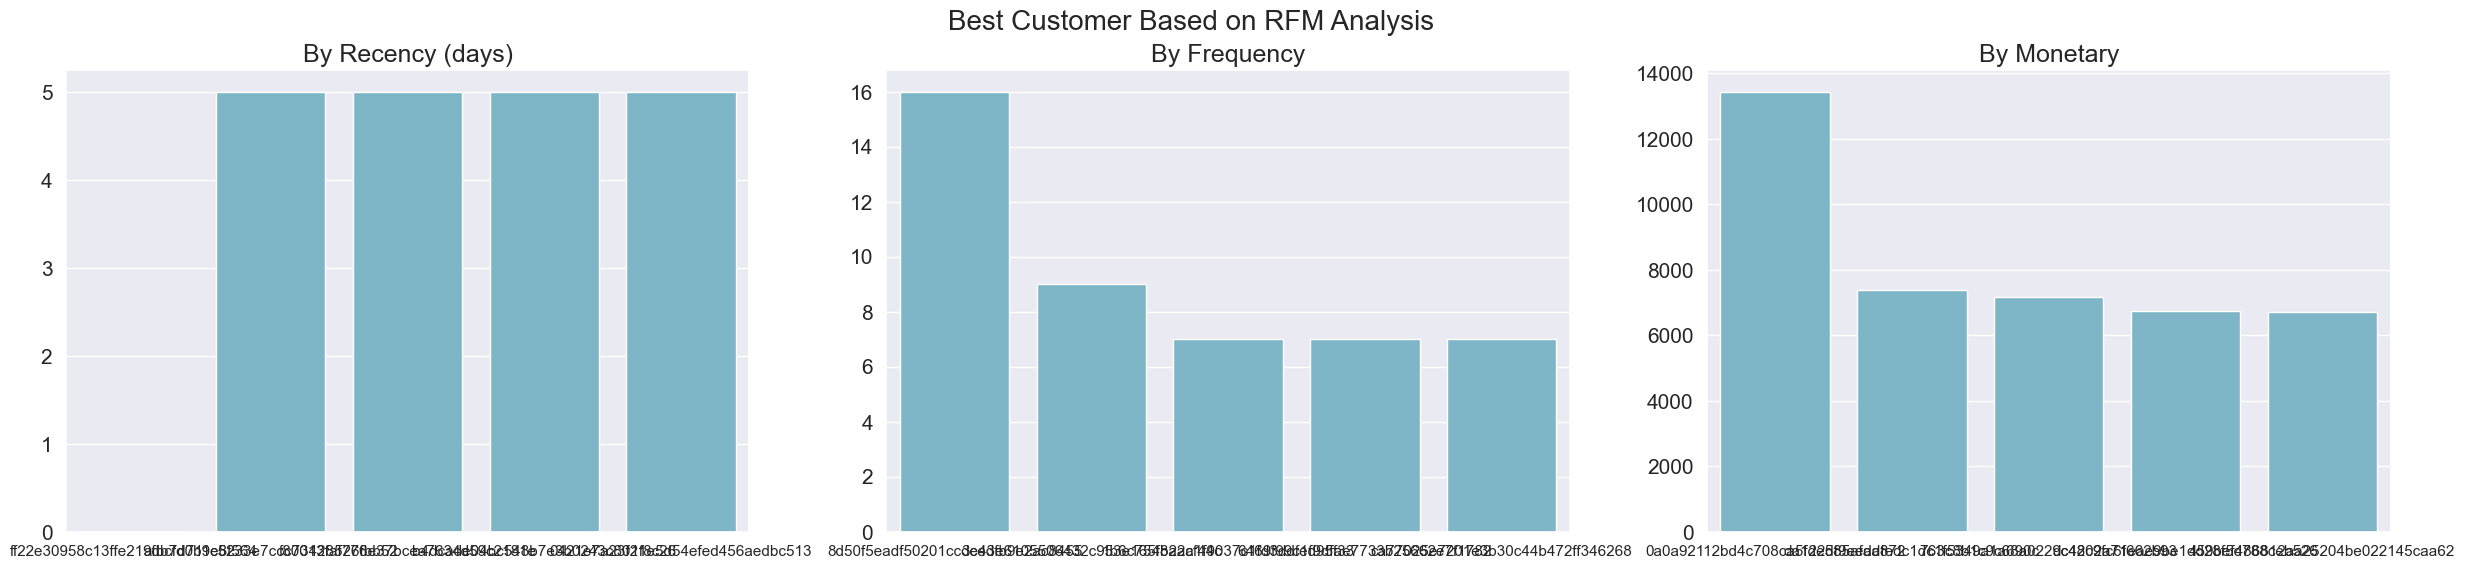

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", hue="customer_id", legend=False, data=rfm_df.sort_values(by='recency', ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_title("By Recency (days)", loc='center', fontsize=18)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='y', labelsize=15)
print(rfm_df.sort_values(by='recency', ascending=True).head(5))

sns.barplot(y="frequency", x="customer_id", hue="customer_id", legend=False, data=rfm_df.sort_values(by='frequency', ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_title("By Frequency", loc='center', fontsize=18)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='y', labelsize=15)
print(rfm_df.sort_values(by='frequency', ascending=False).head(5))

sns.barplot(y="monetary", x="customer_id", hue="customer_id", legend=False, data=rfm_df.sort_values(by='monetary', ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_title("By Monetary", loc='center', fontsize=18)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis='y', labelsize=15)
print(rfm_df.sort_values(by='monetary', ascending=False).head(5))


plt.suptitle("Best Customer Based on RFM Analysis", fontsize=20)
plt.show()


## Insight from RFM Analysis
- From the top recency,customers buy product in the last 5 days. 
- Customer most frequently buy rate is  16 times.
- The most revenue from customer spending is 13440.00.

Save data into csv 


In [178]:
all_df.to_csv('dashboard/main_data.csv', index=False)

# Conclusion
## What are the most selling products and what are the fewest selling products?
Top 5 Most Selling Products: bed_bath_table, furniture_decor, health_beauty, sports_leisure, computers_accessories. bed_bath_table is the most selling product with 13665 order_item_id.

Top 5 Fewest Selling Products: security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship. security_and_services is the fewest selling product with 2 order_item_id.

## How demographic customers look like?
Based on city, customers are mostly from sao paulo. Based on state, customers are mostly from SP.

Top 8 Cities with Most Customers: sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba, campinas, porto alegre, salvador.
Top 8 States with Most Customers: SP, RJ, MG, RS, PR, SC, BA, DF.

## How performance order and revenue per month?
The monthly order performance is increasing from January to August. The revenue  is increasing from January to August. Despite  it, order and revenue drop in September. The order performance can affect the revenue performance. If the order performance is increasing, the revenue performance will increase too.

## Who are the top 5 of the most loyal customers ?
Based on total order and total spending, the top 5 most loyal customers are:
- 0a0a92112bd4c708ca5fde585afaa872 with total spending 13440.00 and total order 8
- da122df9eeddfedc1dc1f5349a1a690c with total spending 7388.00 and total order 2
- 763c8b1c9c68a0229c42c9fc6f662b93 with total spending 7160.00 and total order 4
- dc4802a71eae9be1dd28f5d788ceb526 with total spending 6735.00 and total order 1
- 459bef486812aa25204be022145caa62 with total spending 6729.00 and total order 1

## Based on RFM Analysis
- From the top recency, customers buy product in the last 5 days.
- Customer most frequently buy rate is 16 times.
- The most revenue from customer spending is 13440.00.

